# 상관분석 - 1
- 출처 : https://m.blog.naver.com/parksehoon1971/221575542220

### 1. 데이터 준비

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('airquality.csv')
df.head()

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56


In [3]:
corr = df.corr(method='pearson')
corr

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.601547,0.698360
Solar.R,0.348342,1.000000,-0.056792,0.275840
Wind,-0.601547,-0.056792,1.000000,-0.457988
Temp,0.698360,0.275840,-0.457988,1.000000


In [4]:
# 결측치 제거
df_drop_na = df.dropna()
df_drop_na.head()

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65


In [5]:
corr_1 = df_drop_na.corr(method='pearson')
corr_1

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.612497,0.698541
Solar.R,0.348342,1.000000,-0.127183,0.294088
Wind,-0.612497,-0.127183,1.000000,-0.497190
Temp,0.698541,0.294088,-0.497190,1.000000


## 2. 데이터 시각화

In [6]:
# 모듈
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

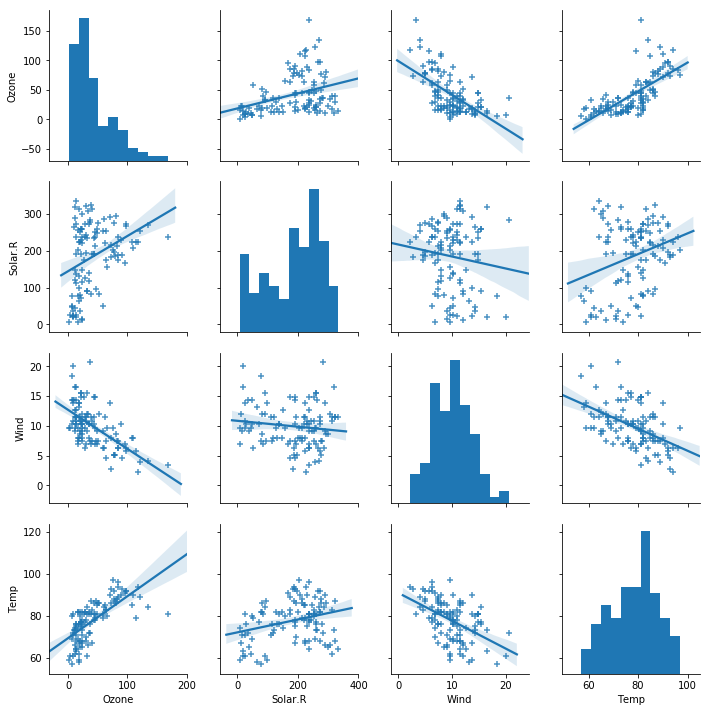

In [7]:
# pairplot
g = sns.pairplot(df_drop_na, kind='reg', markers='+')

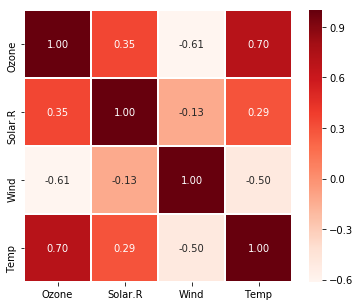

In [9]:
# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(data=corr_1, annot=True, fmt='.2f', linewidths=0.5, cmap='Reds')

# 상관분석 - 2

In [16]:
cor01 = pd.read_excel('cor01.xlsx')
cor01

,제품 판매량,일인당소득
0,8,20
1,19,34
2,11,20
3,5,15
4,22,28
5,13,28
6,6,14
7,16,20
8,16,38
9,12,32


In [17]:
cor01.columns = ['sales','gdp1']
cor01

,sales,gdp1
0,8,20
1,19,34
2,11,20
3,5,15
4,22,28
5,13,28
6,6,14
7,16,20
8,16,38
9,12,32


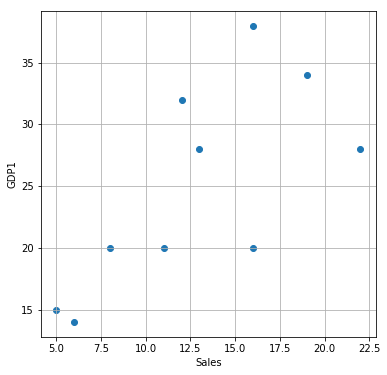

In [20]:
# 산점도
plt.figure(figsize=(6,6)) # 플롯 사이즈 지정
plt.scatter(cor01.sales, cor01.gdp1)
plt.xlabel('Sales')
plt.ylabel('GDP1')
plt.grid()
plt.show()

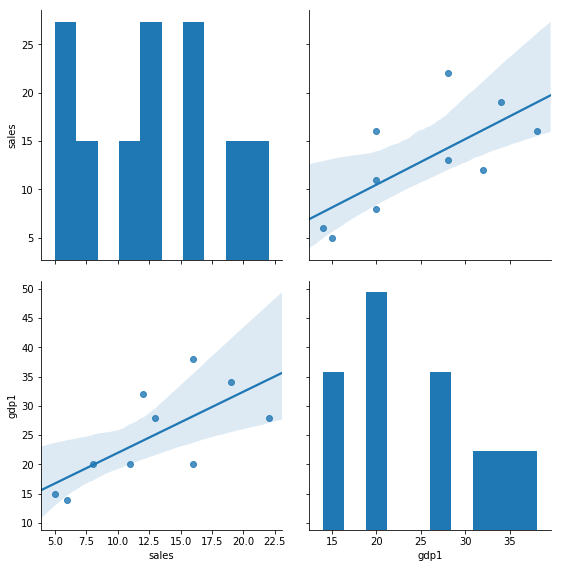

In [19]:
# pairplot
sns.pairplot(cor01, kind='reg', height=4)

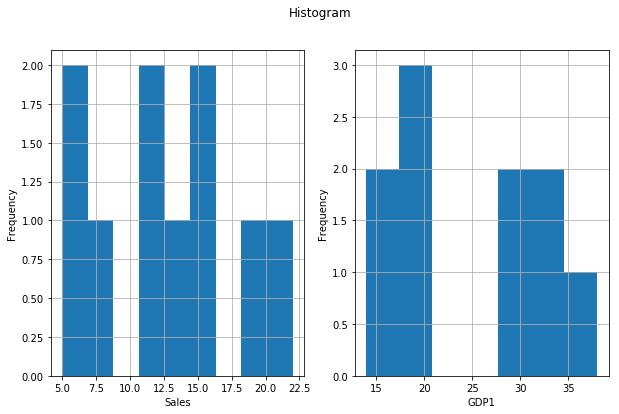

In [23]:
# 히스토그램
plt.figure(figsize=(10,6))
plt.suptitle('Histogram')

plt.subplot(1,2,1)
plt.hist(cor01.sales, bins=9) # sales를 9등분하여 히스토그램 작성
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(1,2,2)
plt.hist(cor01.gdp1, bins=7) 
plt.xlabel('GDP1')
plt.ylabel('Frequency')
plt.grid()

plt.show()

In [24]:
# 상관계수
import scipy.stats as stats

In [25]:
# pearson 상관계수 검정
corr = stats.pearsonr(cor01.sales, cor01.gdp1)
corr # 결과 : 피어슨상관계수, P-value

(0.70257685636819556, 0.023466513078597345)

In [26]:
# 스피어만 상관계수 검정
rho = stats.spearmanr(cor01.sales, cor01.gdp1)
rho

SpearmanrResult(correlation=0.73462388750813223, pvalue=0.015523515329958141)

In [27]:
# 켄달의 타우 검정
tau = stats.kendalltau(cor01.sales, cor01.gdp1)
tau

KendalltauResult(correlation=0.56505793121761339, pvalue=0.028078796256186304)